In [177]:
#Obeservations
#1:BBCWorld and CBSNews has similar values for sentimental compound, means they might select same news to report on
#2:FoxNews and CNNBreakingNews could be opposite, has lower values, means more negative words in tweets
#3:NYTimes has more neutral words in their tweets for the recent 100 tweets
#4:In summary, each media might select differenct news/events to tweet about 

# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "xTTdsqqTX2xKOEISozisOjRtY"
consumer_secret = "bsgKryuKyfqujsvqp03kjc8xclx0sFjcnpZy1yDmAj2kFO6JHD"
access_token = "901200317659983873-WOlQ8k9RAAFyZjHfyklEPUbu0LBWeKj"
access_token_secret = "HuP2rSzu94nlGQyCBCCkuhsdE1rjsrlj72pfNXVlrxVOy"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

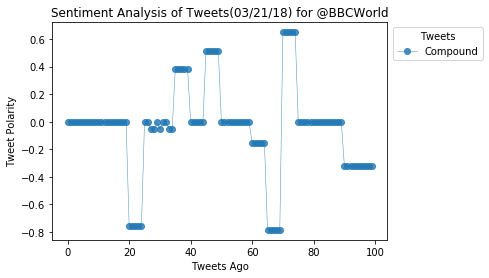

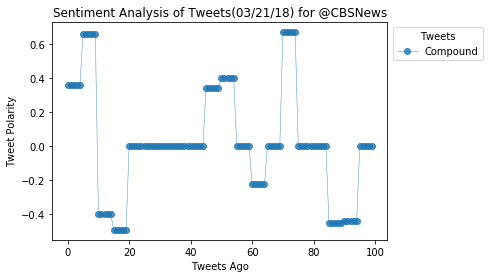

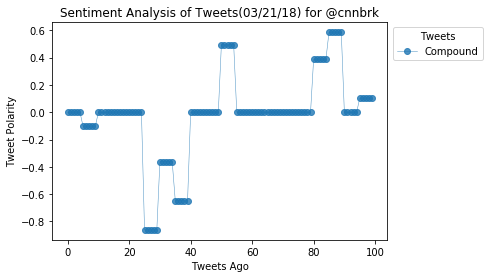

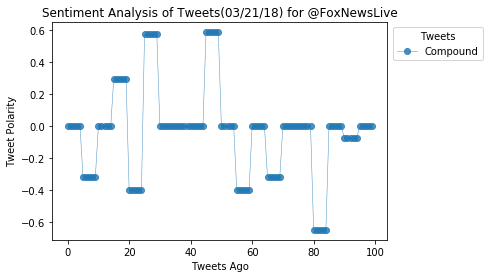

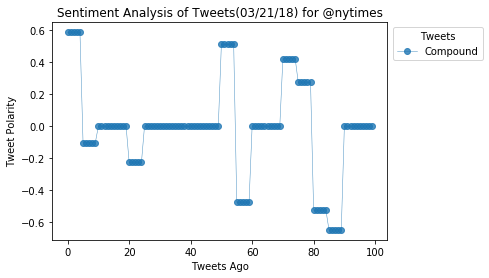

In [182]:
target_users = ['@BBCWorld', '@CBSNews', '@cnnbrk','@FoxNewsLive','@nytimes']
sentiments_all_dict = {}
sentiments_all_df=[]

for target_user in target_users:
    counter =1
    sentiments = []
    
    #Get 100 recent tweets for each news
    for x in range(5):
        public_tweets = api.user_timeline(target_user, result_type='recent')

        for tweet in public_tweets:
            scores = analyzer.polarity_scores(tweet['text'])
            compound = scores['compound']
            pos = scores['pos']
            neu = scores['neu']
            neg = scores['neg']
            #tweets_ago = counter

            sentiments.append({'Date': tweet['created_at'],
                              'Compound': compound,
                              'Positive': pos,
                              'Negative': neg,
                              'Neutral' : neu,
                              'Tweets Ago': counter})
            counter = counter+1
    
    sentiments_df = pd.DataFrame.from_dict(sentiments)
    sentiments_df = sentiments_df.sort_values('Date')
    sentiments_all_dict[target_user]=sentiments_df['Compound']

    media_handle = plt.plot(np.arange(len(sentiments_df['Compound'])), sentiments_df['Compound'],
            marker='o', linewidth=0.5, alpha=0.8)
    plt.title("Sentiment Analysis of Tweets(%s) for %s" %(time.strftime('%x'),target_user))
    plt.ylabel('Tweet Polarity')
    plt.xlabel('Tweets Ago')
    plt.legend(handles=media_handle, loc=1, bbox_to_anchor=(1.3,1), title='Tweets')
    plt.show()

In [175]:
sentiments_all_df=pd.DataFrame(sentiments_all_dict)
sentiments_all_df=sentiments_all_df.rename(index=str, columns={'@BBCWorld':'BBC','@CBSNews': 'CBS','@FoxNewsLive':'Fox','@cnnbrk':'CNN','@nytimes':'NYTimes'})
sentiments_all_df.head()

,BBC,CBS,Fox,CNN,NYTimes
0,-0.3182,0.0000,0.0000,0.1027,0.0000
1,-0.3182,-0.4404,0.0000,0.0000,0.0000
2,0.0000,-0.4549,0.5719,0.5859,-0.6486
3,0.0000,0.0000,-0.4019,0.3875,-0.5256
4,0.0000,0.0000,0.2960,0.0000,0.2732


In [74]:
news=['BBC', 'CBS', 'CNN','Fox','NYTimes']
sentiments_overall_df = []

sentiments_overall={}
sentiments_overall['BBC']=sentiments_all_df['@BBCWorld'].mean()
sentiments_overall['CBS']=sentiments_all_df['@CBSNews'].mean()
sentiments_overall['CNN']=sentiments_all_df['@cnnbrk'].mean()
sentiments_overall['Fox']=sentiments_all_df['@FoxNewsLive'].mean()
sentiments_overall['NYTimes']=sentiments_all_df['@nytimes'].mean()

#sentiments_overall_df=pd.DataFrame(list(sentiments_overall), )
sentiments_overall_df = pd.DataFrame.from_dict(sentiments_overall,orient='index')
sentiments_overall_df.columns=['overall']

sentiments_overall_df.head()



,overall
BBC,-0.081970
CBS,0.068895
CNN,-0.123480
Fox,-0.035610
NYTimes,-0.050245


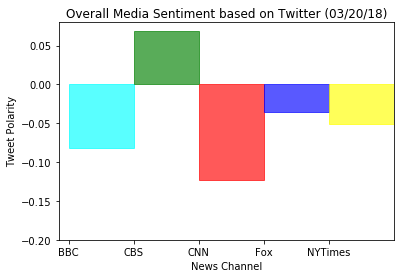

In [111]:
#create the bar chart
x_axis = np.arange(0, len(news))
tick_locations=[]

for x in x_axis:
    tick_locations.append(x)
    
plt.title("Overall Media Sentiment based on Twitter (%s)" %(time.strftime('%x')))
plt.xlabel('News Channel')
plt.ylabel('Tweet Polarity')
plt.xlim(-0.15, len(news))
plt.ylim(-0.20,0.08 )
barlist=plt.bar(x_axis,sentiments_overall_df['overall'], alpha=0.65, align='edge', width=1) #, facecolor=face_colors
barlist[0].set_color('aqua')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('blue')
barlist[4].set_color('yellow')
plt.xticks(tick_locations, news)
plt.show()

In [128]:
sentiments_all_df.head()

,BBC,CBS,Fox,CNN,NYTimes
0,0.6239,0.0772,0.0000,0.4939,-0.6997
1,-0.8555,0.0000,0.0000,0.0000,0.0000
2,-0.0258,0.0000,0.5719,0.0000,0.0000
3,0.0000,-0.3182,-0.4019,-0.6486,-0.3182
4,0.0000,0.0000,0.2960,-0.3612,0.0772


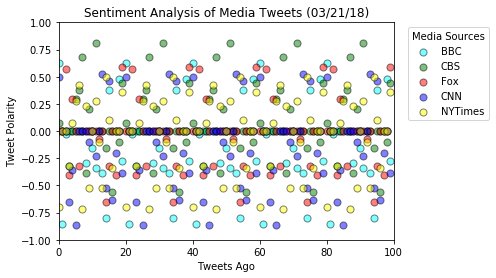

In [167]:
#create the scatter plot for all media sources
face_colors=['aqua','green','red','blue','yellow']
colorcounter=0
newshandle=[]

for senti in sentiments_all_df:
    x_axis = np.arange(len(sentiments_all_df[senti]))
    data = sentiments_all_df[senti]
    size = 50
    news_handle= plt.scatter(x_axis, data, marker='o', facecolors=face_colors[colorcounter], edgecolors="black", s=size, alpha=0.50)
    plt.ylim(-1, 1)
    plt.xlim(0, 100)
    colorcounter+=1
    newshandle.append(news_handle)

plt.title("Sentiment Analysis of Media Tweets (%s)" %time.strftime('%x'))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(handles=newshandle, loc=1, bbox_to_anchor=(1.3,1), title='Media Sources')
plt.show()